In [1]:
from gemini  import data, engine, helpers
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import talib


In [2]:
# Higher timeframes (>= daily)
df = data.get_htf_candles("BTC_USD", "Bitfinex", "1-DAY", "2017-02-01 00:00:00", "2019-02-01 00:00:00")
df.head()

,date,low,high,open,close,volume
0,2017-02-01,960.10000000,985.00000000,966.19000000,984.01000000,9400.31000000
1,2017-02-02,970.10000000,1010.50000000,985.97000000,1006.50000000,13657.81000000
2,2017-02-03,986.11000000,1020.50000000,1005.70000000,1013.00000000,14772.11000000
3,2017-02-04,1001.60000000,1040.00000000,1018.80000000,1031.80000000,10742.86000000
4,2017-02-05,995.10000000,1033.00000000,1030.10000000,1010.00000000,9699.74000000


In [3]:
df = df[['close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']

In [4]:
rolling_mean = df.y.rolling(window=20).mean()
rolling_mean2 = df.y.rolling(window=50).mean()

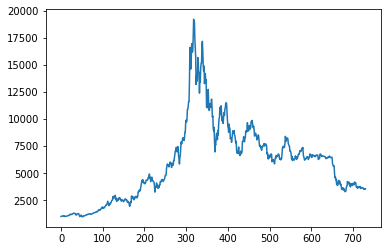

In [5]:
plt.plot(df.ds, df.y, label='BTC')

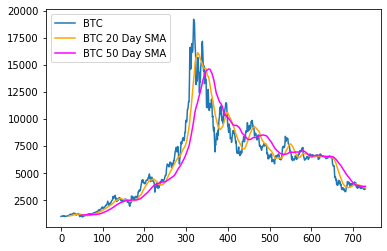

In [6]:
plt.plot(df.ds, df.y, label='BTC')
plt.plot(df.ds, rolling_mean, label='BTC 20 Day SMA', color='orange')
plt.plot(df.ds, rolling_mean2, label='BTC 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

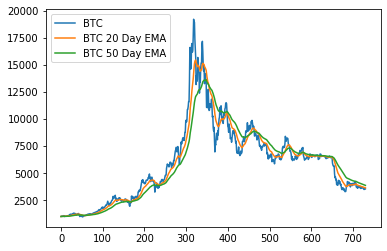

In [7]:
exp1 = df.y.ewm(span=20, adjust=False).mean()
exp2 = df.y.ewm(span=50, adjust=False).mean()
plt.plot(df.ds, df.y, label='BTC')
plt.plot(df.ds, exp1, label='BTC 20 Day EMA')
plt.plot(df.ds, exp2, label='BTC 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

In [8]:
#MACD

In [9]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
exp3 = df.y.ewm(span=9, adjust=False).mean()

In [10]:
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()

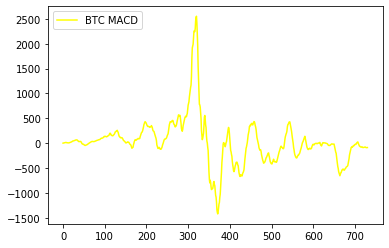

In [15]:
plt.plot(df.ds, macd, label='BTC MACD', color = 'yellow')

plt.legend(loc='upper left')
plt.show()
